# Agenda

### 1. Local features matching
### 2. Motivation
### 3. A-KAZE
### 4. Demo code
***

## 1. What is "Local features matching"

#### 1-1  Definition
Local features matching is an algorithm in order to detect and match keypoints on two images.

=> We will find keypoints on a pair of images with given homography matrix, match them and count the number of inliers.

#### 1-2 Use case of Local features matching

- [Feature detection](https://www.youtube.com/watch?v=nmlfq4eXQ34)
- [Object tracking](https://www.youtube.com/watch?v=3N6EKCOlZKQ)
- [3D Shape restoration from 2D data](http://www.ail.cs.gunma-u.ac.jp/ailwiki/index.php?%E5%B0%8F%E6%83%91%E6%98%9F%E7%94%BB%E5%83%8F%E3%81%AE%E5%AF%BE%E5%BF%9C%E7%82%B9%E6%B1%BA%E5%AE%9A%E3%82%92%E7%9B%AE%E7%9A%84%E3%81%A8%E3%81%97%E3%81%9FSIFT%E3%81%A8AKAZE%E3%81%AE%E6%80%A7%E8%83%BD%E6%AF%94%E8%BC%83)

## 2. Motivation

- For my project
- Best opportunity to know a conventional algorithm for image analysis, which might be useful for your project.
***

## 3. What is A-KAZE??

- 2D feature detection and description method that operates completely in a nonlinear scale space.
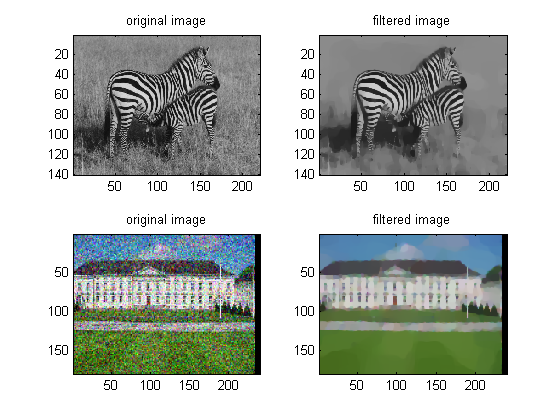

=> we can detect and describe featu!res in nonlinear scale spaces keeping important image details and removing noise as long as we evolve the image in the scale space. We use variable conductance diffusion which is one of the simplest cases of nonlinear diffusion. The nonlinear scale space is build efficiently by means of Additive Operator Splitting (AOS) schemes, which are stable for any step size and are parallelizable.
- [Website](http://www.robesafe.com/personal/pablo.alcantarilla/kaze.html)
***

## 4. Demo code in python

#### 4-0 Environment

- macOS High Sierra Version 10.13.5
- Python 3.6.1
- OpenCV 3

#### 4-1 import libraries

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 4-2 Load image data

In [2]:
img1 = cv2.imread("img1_.jpg")
img2 = cv2.imread("img2_.jpg")

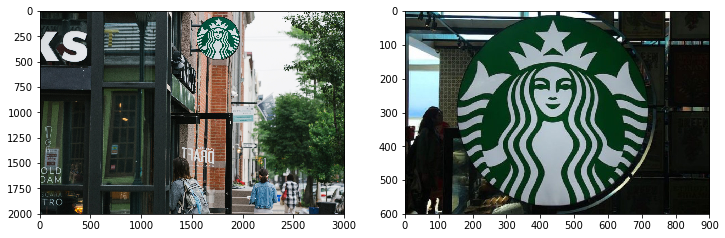

In [3]:
plt.figure(figsize=(12,6))

img1 = img1[...,::-1]
img2 = img2[...,::-1]

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.imshow(img2)

#### 4-3 Get local features by A-KAZE

In [8]:
# initialize the AKAZE descriptor, then detect keypoints and extract
akaze = cv2.AKAZE_create(threshold=0.01)                                

# detect keypoints and extract local invariant descriptors from the image
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

In [9]:
print("keypoints: {}, descriptors: {}".format(len(kp1), des1.shape))
print("keypoints: {}, descriptors: {}".format(len(kp2), des2.shape))

keypoints: 1413, descriptors: (1413, 61)
keypoints: 273, descriptors: (273, 61)


In [10]:
kp1[0]

<KeyPoint 0x11268c870>

In [11]:
des1[0]

array([  0,   6, 252,   1, 190,  85,  10, 193,  52,   5,  91, 206,  96,
       152,  51, 193, 207,  13,  19,  96,   2, 231,  54,  55,   0,   0,
       184, 253, 128,   6,  67, 171,   4,   0, 120, 191,  85,   2, 128,
       122, 149, 252,   3,  94, 178, 229, 215, 163, 240,   0,  20, 233,
         1,  10,  61, 254, 120, 124,  14,  16,  32], dtype=uint8)

#### 4-4 Match the features

In [12]:
# initialize the Brute-Force Matcher
bf = cv2.BFMatcher()

# detect matching by Brute-Force＆KNN
matches = bf.knnMatch(des1, des2, k=2)

* BFMatcher = It takes one feature in first set and try matching with all other features in second set using some distance calculation. And the closest one is returned.
* cv2.drawMatchesKnn = Use K nearest neighbors for detect the closest features . If k=2, it will draw two match-lines for each keypoint. So we have to pass a mask if we want to selectively draw it.

*https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html

In [13]:
matches[0]

[<DMatch 0x110f004b0>, <DMatch 0x110f00430>]

In [14]:
for m, n in matches:
    print(m.distance)

781.425598145
695.309265137
740.101318359
557.965026855
585.339233398
640.634033203
635.552490234
594.190185547
674.798461914
676.897338867
710.074645996
657.442749023
682.118774414
627.363525391
687.715759277
674.196533203
613.439453125
710.340759277
766.827209473
641.078796387
722.515075684
750.653076172
702.304077148
699.022888184
649.337341309
698.260681152
701.597473145
723.385070801
698.060180664
779.301635742
693.223632812
759.385253906
745.745910645
761.129394531
643.050537109
520.486328125
683.61541748
586.131408691
636.757385254
661.102111816
645.049621582
612.175598145
594.326538086
585.819091797
626.897888184
551.506103516
677.437805176
690.047119141
677.954284668
601.039916992
656.092224121
567.870605469
602.513061523
603.887390137
581.544494629
625.84185791
678.288269043
650.827941895
509.474243164
632.699768066
716.044006348
696.500549316
602.760314941
574.80255127
740.179016113
758.637573242
664.48248291
673.869445801
544.508972168
596.837524414
588.593261719
708.693176

#### 4-5 Apply ratio test
We want to get only high score matching points

In [25]:
ratio = 0.6
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

In [26]:
print("High matching points: {}".format(len(good)))

High matching points: 34


#### 4-6 Show images with matching points

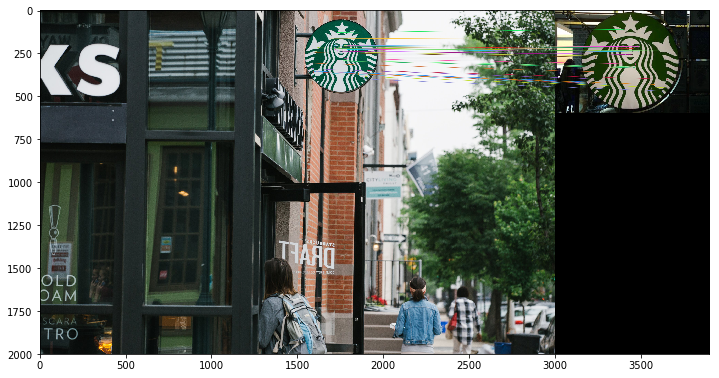

In [27]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:], None, flags=2)

plt.figure(figsize=(12,12))
plt.imshow(img3)

#### (Optional) 4-7 Show only matching areas

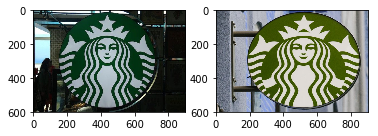

In [28]:
q_kp = []
t_kp = []

for p in good[:2]:
    for px in p:
        q_kp.append(kp1[px.queryIdx])
        t_kp.append(kp2[px.trainIdx])

# 加工対象の画像から特徴点間の角度と距離を計算 --- 修正あり
q_x1, q_y1 = q_kp[0].pt
q_x2, q_y2 = q_kp[-1].pt

q_deg = math.atan2(q_y2 - q_y1, q_x2 - q_x1) * 180 / math.pi
q_len = math.sqrt((q_x2 - q_x1) ** 2 + (q_y2 - q_y1) ** 2)

# テンプレート画像から特徴点間の角度と距離を計算 --- 修正あり
t_x1, t_y1 = t_kp[0].pt
t_x2, t_y2 = t_kp[-1].pt

t_deg = math.atan2(t_y2 - t_y1, t_x2 - t_x1) * 180 / math.pi
t_len = math.sqrt((t_x2 - t_x1) ** 2 + (t_y2 - t_y1) ** 2)

# 切出し位置の計算
x1 = q_x1 - t_x1 * (q_len / t_len)
x2 = x1 + img2.shape[1] * (q_len / t_len)

y1 = q_y1 - t_y1 * (q_len / t_len)
y2 = y1 + img2.shape[0] * (q_len / t_len)

# 整数化 --- 修正
x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)

# 画像サイズ
x, y, c = img1.shape
size = (x, y)

# 回転の中心位置
center = (q_x1, q_y1)

# 回転角度
angle = q_deg - t_deg

# サイズ比率
scale = 1.0

# 回転変換行列の算出
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# アフィン変換
img_rot = cv2.warpAffine(img1, rotation_matrix, size, flags=cv2.INTER_CUBIC)

# 画像の切出し
img_rot = img_rot[y1:y2, x1:x2]

# 縮尺調整
x, y, c = img2.shape
img_rot = cv2.resize(img_rot, (y, x))

img_rot = cv2.cvtColor(img_rot,cv2.COLOR_BGR2RGB)

# 画像表示
plt.subplot(1,2,1)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.subplot(1,2,2)
plt.imshow(img_rot)
plt.show()

---

### Notes

- [A_comparative_analysis_of_SIFT_SURF_KAZE_AKAZE_ORB_and_BRISK](https://www.researchgate.net/publication/323561586_A_comparative_analysis_of_SIFT_SURF_KAZE_AKAZE_ORB_and_BRISK)

### References

- [Pythonで類似度検出① 検出の三つの手法](http://sh0122.hatenadiary.jp/entry/2017/11/23/180044)
- [Kaze特徴量](http://graziegrazie.hatenablog.com/entry/2017/08/08/073337)
- [特徴点のマッチング](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_feature2d/py_matcher/py_matcher.html)
